<img src="../images/26-weeks-of-data-science-banner.jpg"/>

<h1 align="center">Summarizing your Data with Descriptive Statistics </h1>

## What is Descriptive Statistics ?
***

<b>Descriptive Statistics</b>, provides a summary of your dataset giving a measure of the centre, dispersion and shape of your data. Here the data is described as a sample of the whole population, and there are no  inferences made from the sample to the whole population, unlike Inferential Statistics, in which we model the data on the basis of probability theory.

In this notebook, we will be focussing on three key elements of Descriptive Statistics :
<br/>
- Measures Of Central Tendency
    - Mean
    - Median
    - Mode
<br/><br/>

- Measures Of Spread
    - Range
    - Outliers
    - Interquantile Range
    - Variance
<br/><br/>

- Dependence
    - Correlation v/s Causation

## What Are We Going To Learn Today ?
***
- **Dataset for use**
    - **house-price prediction** dataset
    - `.shape()` of data
    - Loading `SalePrice` column
- **Mean**
    - What would be the Central Value ?  - MEAN
    - Mean - Mathematical Repesentation
    - Mean `SalePrice`
    - Disadvantage of Mean
- **Median**
    - Median - Odd Number of Observations
    - Median - Even Number of Observations
- **Median and Inter-Quartile Range (IQR)**
    - IQR - Intuition
    - IQR
    - IQR - A boxplot view
- **Outliers**
    - Outliers - IQR way
    - Outlier,mean,median
    - Box & whisker diagram for SalePrice
    - Outliers Found !
- **What we didn't look into ! - Skewness**
    - Plot histogram of data
    - Analysing histogram
- **Mode**
- **Plotting the Mean, Median & Mode for SalePrice column**
    - When is the mean the best measure of central tendency?
    - When is mode the best measure of central tendency?
        - What is nominal data ?
    - When is the median the best measure of central tendency?
    - What is the most appropriate measure of central tendency when the data has outliers?
- **Spread of the data**
    - Mean squared distance from the mean
    - Variance 
    - Standard Deviation
- **Correlation**
    - Calculating Correlation Coefficient
    - Correltion Explained
    - Interpretation
    - Correlation is not equal to Causation

## Dataset 
***
First things first, we will be using the **housing-price prediction** dataset named **"train.csv"** in this notebook, to work on with.
<br/><br/>

So let's start by loading the data ! 

In [2]:
import pandas as pd 
data = pd.read_csv("./train.csv") # read.csv() is used for rendering a csv in Pandas

data.head()                             # Recollect .head() returns top 5 rows.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **`.shape()`** of the data
***

So above is what our data looks like. Let's check out the shape of the dataset.

In [3]:
print(data.shape)

(1460, 81)


<br/><br/>
That is 1460 rows/observations and 81 columns/features.

## Loading the `SalePrice` column
***

The last column  **SalePrice**  which is also the predictor for this dataset is what we are interested in. Let's start by loading the first 15 values of this column.

In [3]:
Sales_price = pd.Series(data['SalePrice'])
Sales_price.head(15)

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
Name: SalePrice, dtype: int64

## What does it show ?
***
- If you look at the values, they are spread all over.
- Some houses are ~120,000 dollars and some are over ~200,000 
- AND THIS IS JUST IN 15 OBSERVATIONS OF THE DATA

## What would be the Central Value ?  - MEAN
***
- It would be a good thing to find out the value around which all the prices are centered. 
- **Arithmetic Mean** also known as **Average** or just **Mean**, would give us a value central to all the observations and is calculated as :

        Mean = Sum of all Observations / No. of Observations
        


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Mean - Mathematical Representation
***
Mathematically, mean can be applied on a large scale to almost any number of observations one wants to consider and is represented as: 
                $$ \bar{x} = \frac{1}{N}\sum_{i=1}^{N}x_i $$

Where,

-       N = Total number of observations
-       x_i = 'i'th observation (for i= 1,.....,N)

The advantage of mean is that it takes every value into account, easy to calculate and further analysis calculation can be done easily as it is a unique value of the dataset.

## Mean `SalePrice`
***

Let's find out the mean for the **SalePrice** column 

In [11]:
import numpy as np
mean = np.mean(Sales_price)
print(mean)

180921.19589041095


- There we go. Our mean is around 180,922 dollars!
- Now we atleast get a fair idea of what to expect.
- But is the mean a value we can fairly latch on to ?

## Disadvantage of Mean
***

- Finding mean is not a good approach as the **'Mean is often affected by Outliers'** or in simple words if there are some observations larger or smaller than majority of the other observations then the mean tends to deviate towards these values.
<br/><br/>
- To generalize it if the distribution of datasets is skewed(troubled by outliers), we do not choose mean. Here we will have to go for **Median**.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Median
***

- The **Median** is the nothing but the middle value when all values are arranged in Ascending Order!
<br/><br/>
- **It is the value above which lies the upper half of the data and below which lies the lower half. In other words, it is the middle value of a data set.**

 



## Median - Odd Number of Observations
***

- If number of values is ODD – then the median is given as:
     - Median = (N+1)/2 th position element.
<br/><br/>
- Let's understand this with an example
- Example – Find the median of the values – 110, 90, 40, 50, 125, 65, 100 
     - Arranging values in ascending order – 40, 50, 65, 90, 100, 110, 125
     - Here N = 7 (Odd), Median = (7+1)/2 = 4th position element = 90

 



## Median - Even Number of Observations
***
- If number of values is EVEN then median will be *average* of  **(N/2)th and ((N/2) +1)th** element
<br/><br/>
- Example – Find the median of the values –10, 15, 20, 23, 24, 25, 25, 27, 30, 32, 40, 45
    - Here N = 12 (Even), Median = Avg of 12/2  = 6th and (12/2)+1 = 7th element =  (25 + 25)/2 = 25.
    - Note that the values are already arranged in Ascending Order

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Median and Inter-Quartile Range (IQR)
***
- Taking the concept of median a step further, we can define the Inter - Quartile Range.
- IQR is a measure of variability and is based on dividing a data set into quartiles.
- Quartile is the division of a set of observations into four intervals based on the values of the data.


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Inter-Quartile Range - Intuition 
***
![](../images/iqr.gif) 
Image Source : http://resizeandsave.online/dappy-January_21_6.html



<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Inter-Quartile Range
***

- Basically from the image above: Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles where
- Q1 is the "middle" value in the first half of the rank-ordered data set. Also called lower-quartile
- Q2 is the median value in the set.
- Q3 is the "middle" value in the second half of the rank-ordered data set. Also called upper-quartile
<br/><br/>

- The Inter-Quartile Range is the difference between the upper and lower quartiles:
    - Interquartile Range, IQR = Q3 - Q1 (it is the central 50% of data)
    - Where: 
        - Q1 = Median of First half of observations arranged in Ascending Order 
        - Q3 = Median of 2nd Half of observations arranged in Ascending Order

## Inter-Quartile Range - A Boxplot view
***
The figure below is known as a *Boxplot* or *Box & Whisker Diagram* and depending on our data, it also looks like this: 
***
![](../images/boxplot.png)<br/>
Image Source : Slide 18/31 on https://slideplayer.com/slide/5257962/

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Outliers 
***

- The Boxplot above shows some additional observations below MINIMUM and above MAXIMUM. These are **Outliers**.
- There are many ways to mathematically represent or define outliers. One such method is using IQR.


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Outliers - The IQR way
***

- If a data point is 1.5xIQR below the first quartile (Q1) or 1.5xIQR above the third quartile (Q3) then it is an outlier.

- These shown as Black Dots in the boxplot above
<br/><br/>
- **"*Outliers*" have an effect on the Mean!** 

- Let's try and visually understand what this means


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Outliers, Mean and Median
***
Let's consider some scores of Pre-school children in their Reflexes Test
***
![](../images/outliers.png)<br/>
Image Source : https://www.hackerearth.com/blog/machine-learning/descriptive-statistics-python-numpy/

## Outliers, Mean and Median
***
- We see that the mean is affected by these "outliers" and does not give a good estimate of all the values
- The first two students from the **right** are outliers since their score is quite far from that of the majority of the class.
- Even though 8 out of 10 students scored below 6, the mean is **6**!
- In this case, taking the median is a much better Estimate as **3.25** represents a good estimate of how the class performed as a whole! 

<br/><br/>
Let's code and find out what the median and IQR for our **SalePrice** column is

In [4]:
import numpy as np
median = np.median(Sales_price)
print(median)

q1 = Sales_price.quantile(0.25) # lower quartile  } Note: The fuction is .quantile() with 'n'
q3 = Sales_price.quantile(0.75) # upper quartile  }       not .quartile() with 'r'
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", q3 - q1)

163000.0
Q1: 129975.0
Q3: 214000.0
IQR: 84025.0



**Mean** = 180921.19589041095
<br/><br/>
**Median** = 163000.0
<br/><br/>
That is almost a difference of around 20000. This set of observations is definitely skewed. We'll find out what that means in a while.


<img src="../images/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Box & Whisker Diagram for SalePrice
***

Let's do a boxplot for our predictor that is **SalePrice** and get a sense of the outliers if any

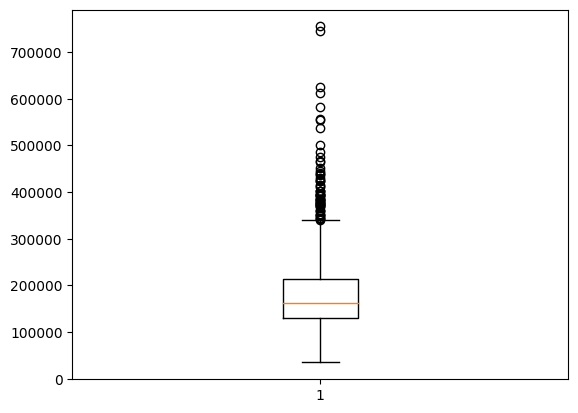

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(Sales_price)
plt.show()

## Outliers Found !
***
 - Woah ! there are quite a few outliers. 
 - Let's code and find out how many ?

In [6]:
## Enter Code to find no. of outliers

outlier_lower_limit = q1 - 1.5*(q3 - q1)
outlier_upper_limit = q3 + 1.5*(q3 - q1)
print(outlier_lower_limit)
print(outlier_upper_limit)

3937.5
340037.5


In [7]:
lower_limit_outliers = Sales_price[Sales_price < outlier_lower_limit].count()
upper_limit_outliers = Sales_price[Sales_price > outlier_upper_limit].count()
print("lower_limit_outliers:", lower_limit_outliers)
print("upper_limit_outliers:", upper_limit_outliers)
print("total outliers:", upper_limit_outliers + lower_limit_outliers)

lower_limit_outliers: 0
upper_limit_outliers: 61
total outliers: 61


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## What we didn't look into ! - Skewness
***
 - Although the Box & Whisker plot is a good method to get an intution on the number of outliers; another good way to find out if we need to consider the median is by checking the: Skewness in distribution.
 - We know that the Median is **more robust** to outliers than the mean, thus giving us a better estimate of the "*Central Tendency*" of our dataset!
 - But what is Skewness? 
 - Let's build our intuition

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Plot a Histogram of the data
***
 - Let's plot a histogram, which is nothing but a Frequency Plot of the no. of times the values in our particular data are observed!
 - These values are arranged in "bins"
 - Each "bin" is a range of values and their height (or y-values) determine **The number of times values in THAT range appear in our dataset!** 
 - Let's code and have a look at the Histogram of our predictor

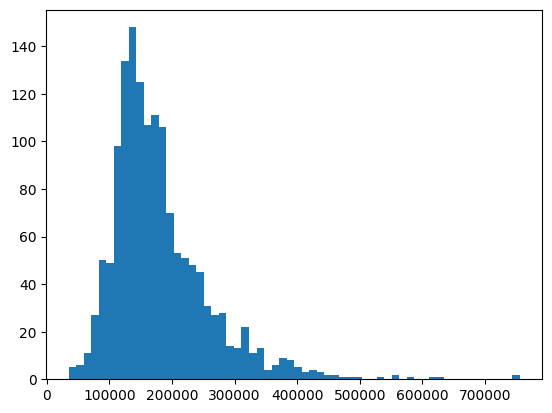

In [8]:
plt.hist(Sales_price, bins=60)
plt.show()

## Analyzing the Histogram
***
 - By just looking, we can tell that the Histogram is not peaked around the center of ranges
 - The *peak* is towards the **left** of the plot, as the rightmost figure below. 
 
 ***
![](../images/skewness.jpg)<br/>
Image Source : http://worldunseen.club/positively-skewed-distribution-math/positively-skewed-distribution-math-a-comparison-of-the-mean-median-and-mode-math-terminology-normal-distribution-math-solver-with-steps/

## Analyzing the Histogram
***
- Thus, we see that our Histogram is "*Positively Skewed*"

- We can see different examples of Skewness from the image on the previous slide and see how Mean, and the Median are affected in each distribution

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Mode
***
 - Simply put:  Mode is the most frequently occurring data point in the given data set. 
 - We arrange the data in increasing order before finding the mode
 - Example The following is an ordered array of the values from below

7.00 11.00 14.25 15.00 15.00 15.50 19.00 19.00 19.00 19.00 21.00 22.00 23.00 24.00 25.00 27.00 27.00 28.00 34.22 43.25
    
 - This grouping makes it easier to see that 19.00 is the most frequently occurring number. In the case of a tie for the most frequently occurring value,two modes are listed.Then the data are said to be bimodal.

In [9]:
mode = Sales_price.mode()
print(mode[0])

140000


<img src="../images/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Plotting the Mean, Median & Mode for SalePrice column
***


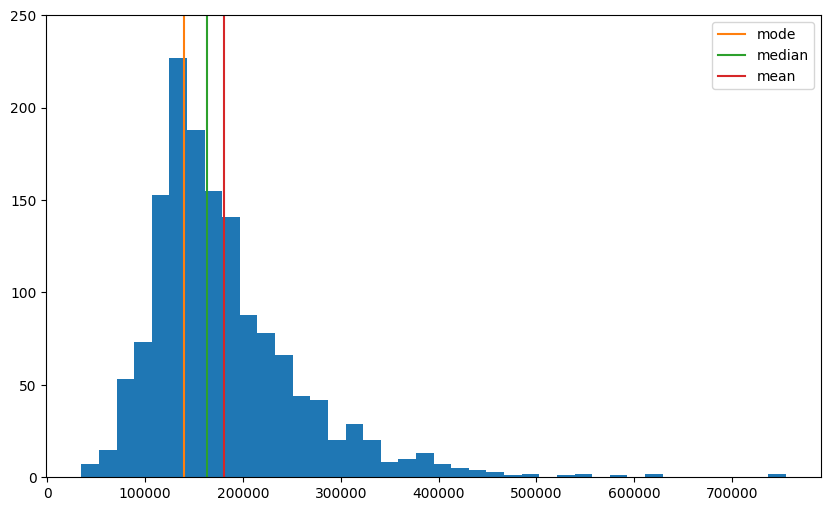

In [12]:
## plot the hist with mean median and mode - This needs to be checked! 

plt.figure(figsize=(10, 6)) 
plt.hist(Sales_price, bins=40)
plt.plot([mode]*300, range(300), label='mode') 
plt.plot([median]*300, range(300), label='median')
plt.plot([mean]*300, range(300), label='mean')
plt.ylim(0, 250)
plt.legend()
plt.show()

## When is the mean the best measure of central tendency?
***

- The mean is usually the best measure of central tendency to use when your data distribution is continuous and symmetrical, such as when your data is normally distributed. 

- However, it all depends on what you are trying to show from your data.

- You will learn about Normal Distributions in Inferential Statistics 

## When is the mode the best measure of central tendency?
***

- The mode is the least used of the measures of central tendency 

- The mode will be the best measure of central tendency (as it is the only one appropriate to use) when dealing with nominal data. 

- The mean and/or median are usually preferred when dealing with all other types of data, but this does not mean it is never used with these data types

### What is nominal data?
***

- Nominal variables are categorical variables that have two or more categories, but which do not have an intrinsic order. 

- For example
    - a real estate agent could classify their types of property into distinct categories such as houses, condos, co-ops or bungalows. So "type of property" is a nominal variable with 4 categories called houses, condos, co-ops and bungalows.

- Of note, the different categories of a nominal variable can also be referred to as groups or levels of the nominal variable.         

## When is the median the best measure of central tendency?

- The median is usually preferred to other measures of central tendency when your data set is skewed (i.e., forms a skewed distribution) or you are dealing with ordinal data. 

- We already know what skewed data is! 


- However, the mode can also be appropriate in these situations, but **IS NOT** as commonly used as the median.

## What is the most appropriate measure of central tendency when the data has outliers?

- The median is usually preferred in these situations because the value of the mean can be distorted by the outliers. 

- However, it will depend on how influential the outliers are. If they do not significantly distort the mean, using the mean as the measure of central tendency will usually be preferred.

### In a normally distributed data set, which is greatest: mode, median or mean?

- If the data set is perfectly normal, the mean, median and mean are equal to each other (i.e., the same value).

### For any data set, which measures of central tendency have only one value?

- The median and mean can only have one value for a given data set. The mode can have more than one value

<img src="../images/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Spread of the data
***
 - Let's choose the value 250,000 from the SalePrice column and check how far this value is from the mean when compared to other points in the data set
 - We measure this as follows:
             (250,000 - mean)/Random Variation
 - We know the mean, we found that before
 - What is Random Variation? 
     - It's nothing but the *Average variation of the data from the mean* 
 - How do we measure this? 
 

## To start off 
***

 - Range of data is simply:
     - Max Value of Data - Min Value of data
 - Let's check the Range of John's data

In [13]:
Range = np.max(Sales_price)-np.min(Sales_price)
Range

720100

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Mean squared distance from the mean 
***
 - Now if we square the differences between mean and every observation and take a sum, we get:
 - We get  =   
   $$ {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } } $$
 - THIS IS CALLED THE VARIANCE! 
 - It's the mean squared distance of the observation from the mean

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Variance - Formula
***
- Therefore variance is calculated as: 

 $$ {σ}^2 (Variance) = {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } } $$

- It is denoted by ${σ}^2$

In [14]:
variance = Sales_price.var()
print(variance)

6311111264.297451


## Need for Standard Deviation
***
 - In our case, Variance is calculated in terms of ${dollars}^2$
 - This isn't really practical as the mean of the Prices is expressed in "dollars" 
 - Therefore, we can simply square our Variance and obtain

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Standard Deviation
***
- It is *squareroot of the mean squared distance from the mean* 
- It is denoted by σ

 $$ σ = \sqrt{\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } } $$


Let's find out the Standard Deviation for our data

In [15]:
from math import sqrt

std = sqrt(variance)
print(std)

79442.50288288663


## Spread of Data - Back to where we began 
***
- Let's check what John originally set out to check
- How far the Price of this house is from the mean when compared to other points in the data set
- We want to check this: 

(250,000 - mean)/Random Variation

- The Standard Deviation is a good measure of spread of Random Variation in a given data 
- Thus we want to check: 

(250,000 - mean)/Standard Deviation

In [16]:
(250000 - mean)/std

0.8695446593799336

## Importance of Standard Deviation
***
- If we know that our data is *Normally Distributed*, we can confidently say that: 
   - ~68% of the data is within one Std. Dev. from the mean 
   - ~95% of the data is within 2 Std. Dev. from the mean 
   - ~99.7% of the data is within 3 Std Dev from the mean 
    ***
![](../images/normal_curve.png)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Correlation
***
 - Now what if we want to know how the price is affected by different factors such as the Living Room area, Garage Area, etc which are some of the other columns/features in our dataset.
 - This is nothing but Correlation! 

## Calculating the Correlation Coefficient
***
- A good way to determine this correlation is to use an already existing method known as Pearson Correlation Coefficient 
- Correlation Coefficient is a measure of **linear reationship** between two variables
- It always outputs in the range of [-1,1] 
- This is a bit complicated but easy when you break it down 

$$ r = \frac{N\sum xy - (\sum x)(\sum y)}{\sqrt {[N\sum x^2 -(\sum x)^2][N\sum y^2 -(\sum y)^2]}} $$

$
\begin{align}
Where :  
\end{align}
$

$
\begin{align}
N = Number\thinspace of\thinspace pairs\thinspace of\thinspace scores 
\end{align}
$

$
\begin{align}
\sum xy = sum\thinspace of\thinspace the\thinspace products\thinspace of\thinspace paired\thinspace scores\thinspace 
\end{align}
$

$
\begin{align}
\sum x = sum\thinspace of\thinspace x\thinspace scores\thinspace 
\end{align}
$

$
\begin{align}
\sum y = sum\thinspace of\thinspace y\thinspace scores\thinspace 
\end{align}
$

$
\begin{align}
\sum x^2 = sum\thinspace of\thinspace squared\thinspace x\thinspace scores\thinspace 
\end{align}
$

$
\begin{align}
\sum y^2 = sum\thinspace of\thinspace squared\thinspace y\thinspace scores\thinspace 
\end{align}
$

## Correlation Explained
***
- Understanding values: 
   - 1 indicates a strong positive relationship.
   - -1 indicates a strong negative relationship.
   - A result of zero indicates a non-linear relationship or no relationship at all.
***
![](../images/correlation2.png)<br/>
Image Source : https://www.statisticshowto.datasciencecentral.com/direction-of-association/

   

## Interpretation 
***
 - A correlation coefficient of 1 means that for every positive increase of 1 in one variable, there is a positive increase of 1 in the other.
 - A correlation coefficient of -1 means that for every positive increase of 1 in one variable, there is a negative decrease of 1 in the other.
 - Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.

## Let's find out...
***
- What is the Correlation between the Sales price and the Living Room Area?

- Let's find out. This should be easy.


In [13]:
living_room_area = data.GrLivArea
np.corrcoef(Sales_price, living_room_area)[0,1]  # Returns Pearson product-moment correlation coefficients.

0.7086244776126523

## More on Correlation
***
The absolute value of the correlation coefficient gives us the relationship strength. The larger the number, the stronger the relationship. For example, |-.75| = .75, which has a stronger relationship than .65.


 - Also, we can creatively plot "heatmaps" in Python to make our plot fancy and see the Correlation trends between Several variables! 
 
 
 - This is a very handy trick used by Data Scientists All over the world! 
 
 - The next slide displays the code where The Correlation trends amongst the "Lot Area", Living Room Area, Garage Area and Sales Price of the house are captured! 

             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.263116    0.180403   0.263843
GrLivArea   0.263116   1.000000    0.468997   0.708624
GarageArea  0.180403   0.468997    1.000000   0.623431
SalePrice   0.263843   0.708624    0.623431   1.000000


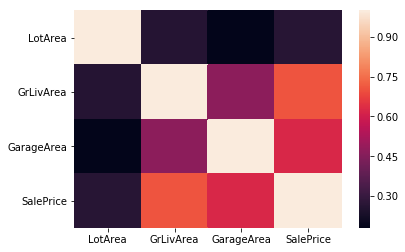

In [18]:
#considering 4 continous variable and finding the correlation
import seaborn as sns
%matplotlib inline
x = data[['LotArea','GrLivArea','GarageArea','SalePrice']]
corr = x.corr()      # Computes pairwise correlation of columns excluding NaNs
sns.heatmap(corr)
print(corr)

## Correlation doesn't imply Causation

However, correlation does not imply causation. There may be, for example, an unknown factor that influences both variables similarly.

Causation indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect. 

A statistically significant correlation has been reported, for example, between yellow cars and a lower incidence of accidents. That does not indicate that yellow cars are safer, but just that fewer yellow cars are involved in accidents. A third factor, such as the personality type of the purchaser of yellow cars, is more likely to be responsible than the color of the paint itself.



In [15]:
df = pd.read_csv('./weather_small_2012.csv')
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
In the weather dataset, find the mean and median for Wind Speed and Temperature columns

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
In the weather dataset, find the mode for the Weather column

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
Find out the skewness, if any of the Wind Speed and Temperature columns by plotting a histogram

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
Find out the variance and standard deviation for Dew Point Temperature column.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
Find out the correlation between all the continuous features in the weather dataset and plot a heatmap using Seaborn.